In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Import data

In [2]:
path = r'C:\Users\Yan Peng\10-2020 Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust.pkl'))

In [5]:
df.shape

(32435059, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32435059 entries, 0 to 32435058
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   _merge                  category
 10  product_name            object  
 11  aisle_id                float64 
 12  department_id           float64 
 13  prices                  float64 
 14  _merge2                 category
 15  price_label             object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

In [7]:
df_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_checked.pkl'))

# 2. Histogram: Order frequency by hour

Text(0.5, 0, 'Hours of the Day')

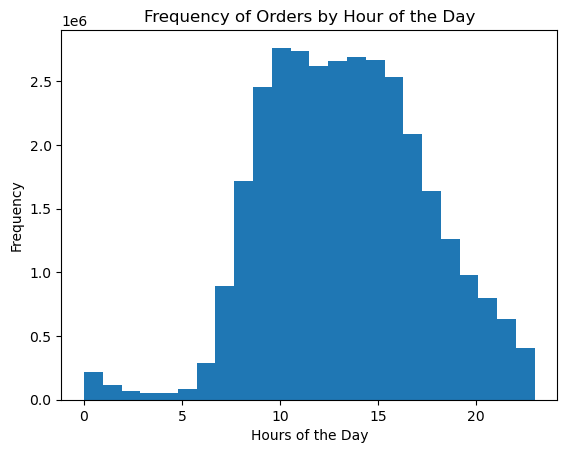

In [25]:
# Create histogram

hist = df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Frequency of Orders by Hour of the Day')
plt.xlabel('Hours of the Day')

##### The histogram shows the number of orders of each hour, resembling a bar chart. Order placements are relatively low after midnight and during the night. The volume begins to increase in the early morning, reaching its peak between 10:00 and 15:00, before gradually tapering off thereafter.

In [26]:
# Export chart

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

# 3. Bar chart: Order frequency by loyalty flag

Text(0.5, 0, 'Frequency')

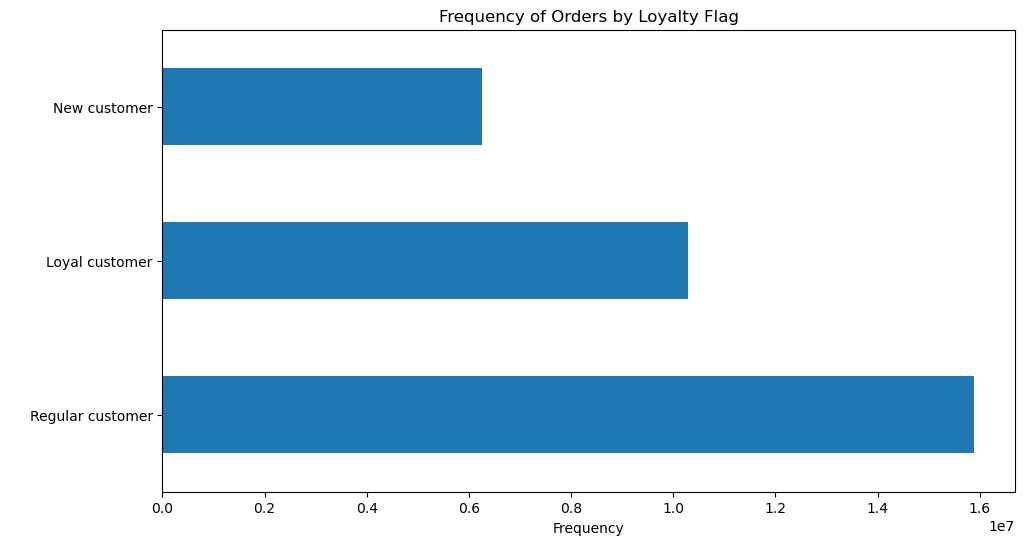

In [32]:
# Create a bar chart

bar = df['loyalty_flag'].value_counts().plot.barh(figsize=(11, 6))
plt.title('Frequency of Orders by Loyalty Flag')
plt.ylabel(' ')
plt.xlabel('Frequency')

##### Although Loyal customers place more orders than Regular ones (per definition), the latter show more product orders, indicating that there is a greater number of Regular customers than Loyal customers.

In [33]:
# Export chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# 4. Difference in expenditure by hour of the day

## 4.1 Sampling data

In [11]:
np.random.seed(4)

In [12]:
# Create a list holding the True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(df)) <= 0.7

In [13]:
# Create 70% of the original data in the dataframe big

big = df[dev]

In [14]:
# Create 30% of the original data in the dataframe small

small = df[~dev]

In [15]:
# Compare sample sizes to original data size

len(big) + len(small)

32435059

In [16]:
len(df)

32435059

## 4.2 Line chart: Prices across hours of the day

In [17]:
# Create a dataframe based on the small sample containing two relevant columns

df_2 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Price')

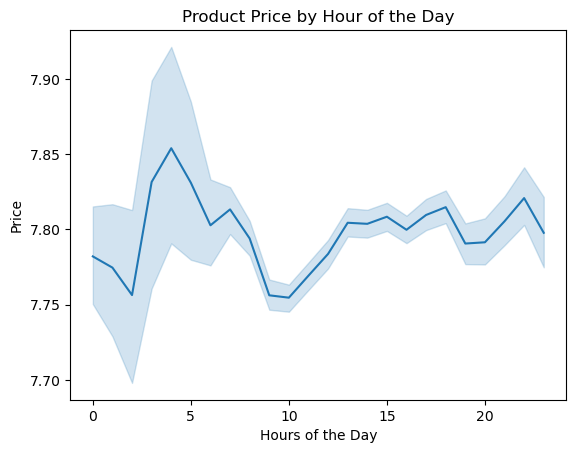

In [34]:
# Create a line chart

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Product Price by Hour of the Day')
plt.xlabel('Hours of the Day')
plt.ylabel('Price')

##### The average prices of products ordered during the day are similar (~$7.80).

In [35]:
# Export chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

# 5. Analysis of customer demographics

#### *Note that the customer data is fabricated for the purpose of practice.

## 5.1 Relationship between age and number of dependents

In [8]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        206209 non-null  int64 
 1   first_name     194950 non-null  object
 2   surname        206209 non-null  object
 3   gender         206209 non-null  object
 4   state          206209 non-null  object
 5   age            206209 non-null  int64 
 6   date_joined    206209 non-null  object
 7   nr_dependants  206209 non-null  int64 
 8   fam_status     206209 non-null  object
 9   income         206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


Text(0, 0.5, 'Number of Dependants')

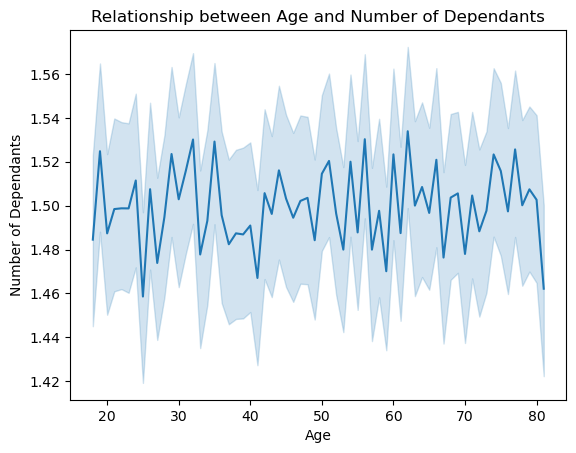

In [36]:
# Create a line chart

line_2 = sns.lineplot(data = df_cust, x = 'age',y = 'nr_dependants')
plt.title('Relationship between Age and Number of Dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')

##### The number of dependants stays relatively consistent  across all ages.

In [37]:
# Export chart

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

# 5.2 Relationship between age and spending power

Text(0, 0.5, 'Income')

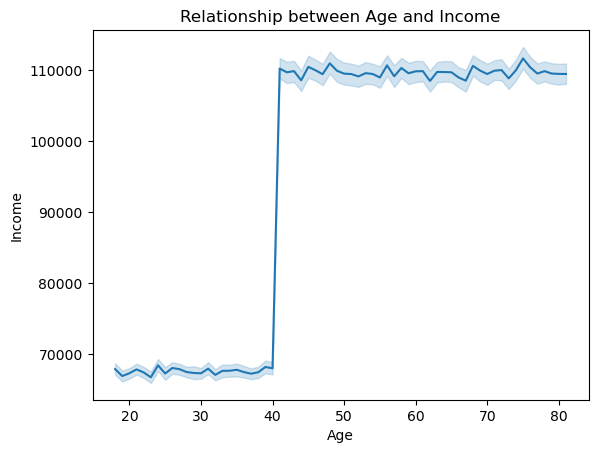

In [38]:
# Create a line chart

line_3 = sns.lineplot(data = df_cust, x = 'age',y = 'income')
plt.title('Relationship between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')

##### There is a clear distinction in income between those younger than 40 years of age and those older than 40, with customers under 40  earning less than $70000 and those over 40 earning around 110000.

In [39]:
# Export chart

line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_income.png'))